# Car Price Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("data/car_prices.csv", on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [6]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

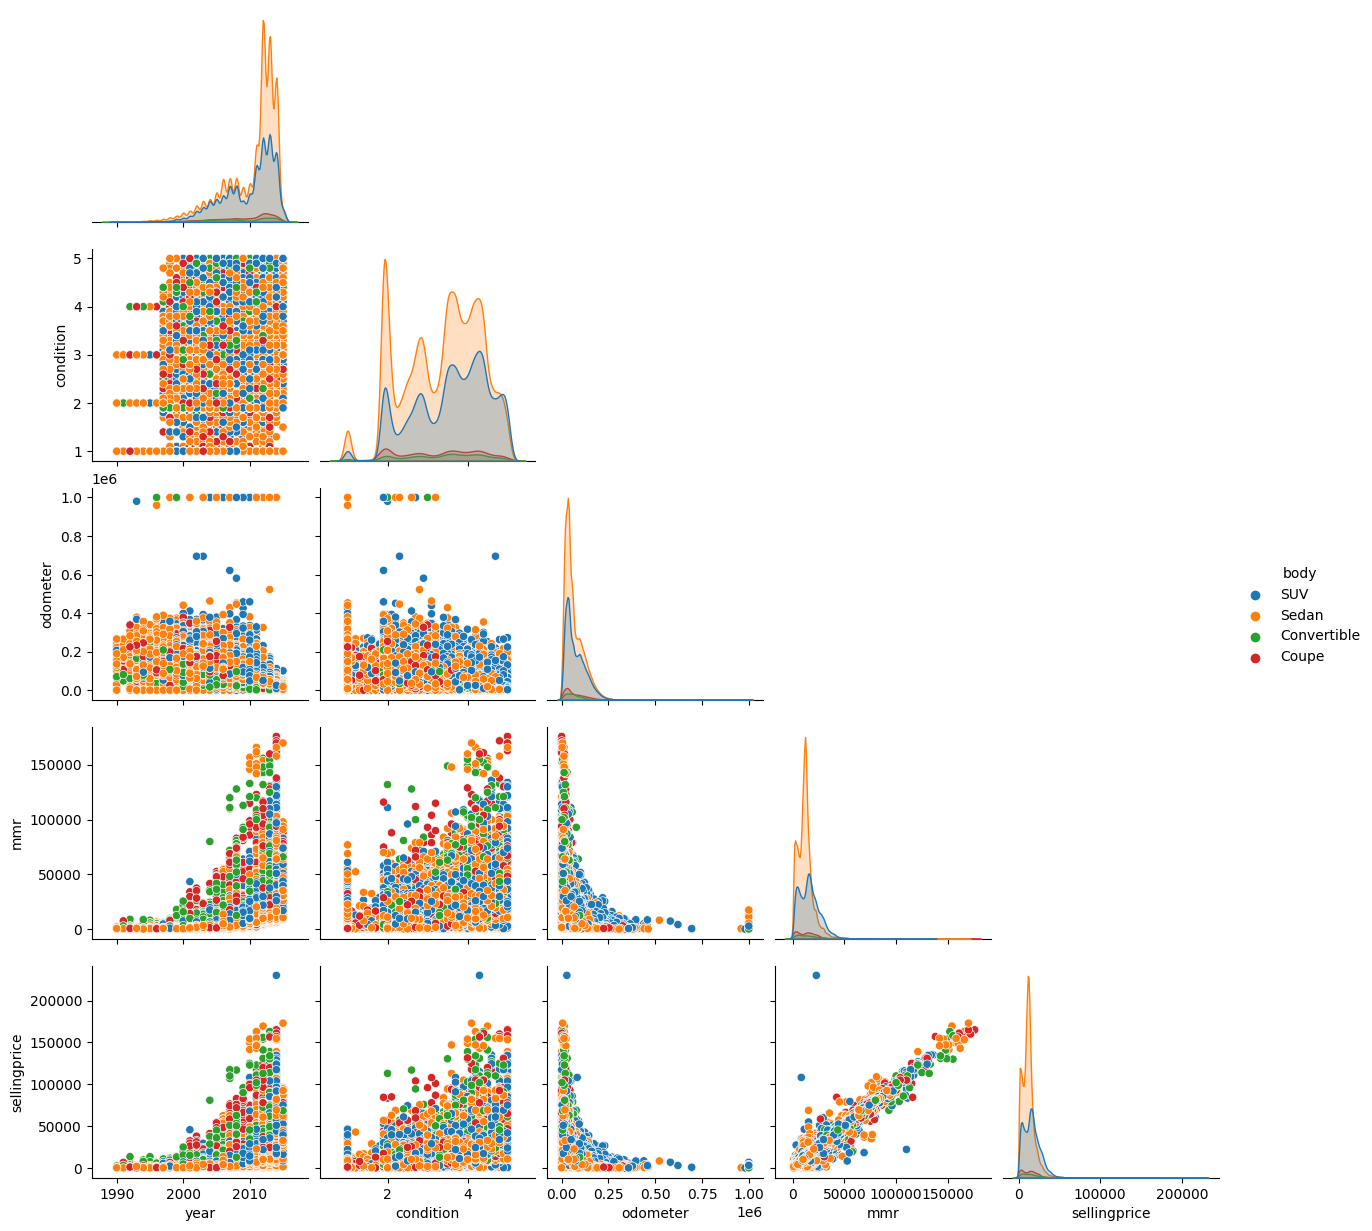

In [7]:
sns.pairplot(
    cars.query("body in @style_list"),
    corner=True,
    hue='body'
)

C:\Users\erolg\AppData\Local\Temp\ipykernel_21964\9174353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.corr(),


<Axes: >

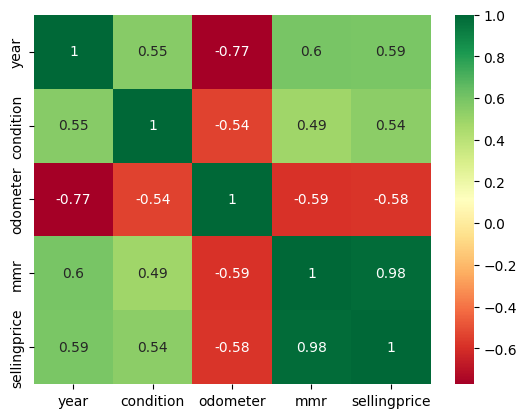

In [8]:
sns.heatmap(
    cars.corr(), 
    cmap="RdYlGn", 
    annot=True
)

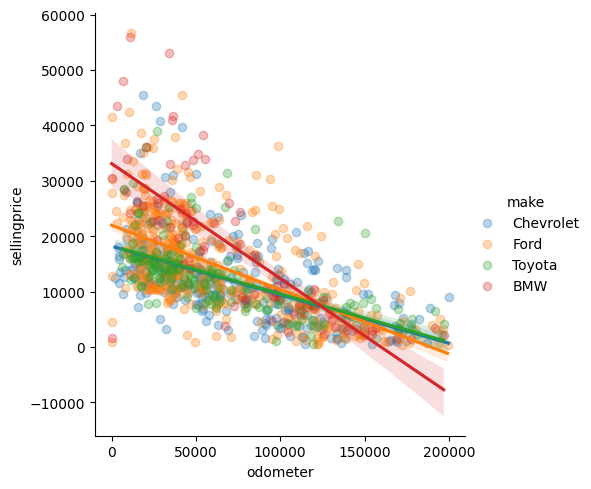

In [9]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),
    hue="make",
    scatter_kws=({"alpha": .3}),
)

In [11]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=-0.10686305954841516, intercept=20818.28408595647, rvalue=-0.5773849819198604, pvalue=0.0, stderr=0.00021987650761310986, intercept_stderr=18.58796228286367)

In [12]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818873, 20840.011075886512)
BMW: (-0.2225033042967633, 35567.979744684795)
Toyota: (-0.07594777614361674, 17813.017107685304)
Chevrolet: (-0.08841045962774952, 18705.587357485056)


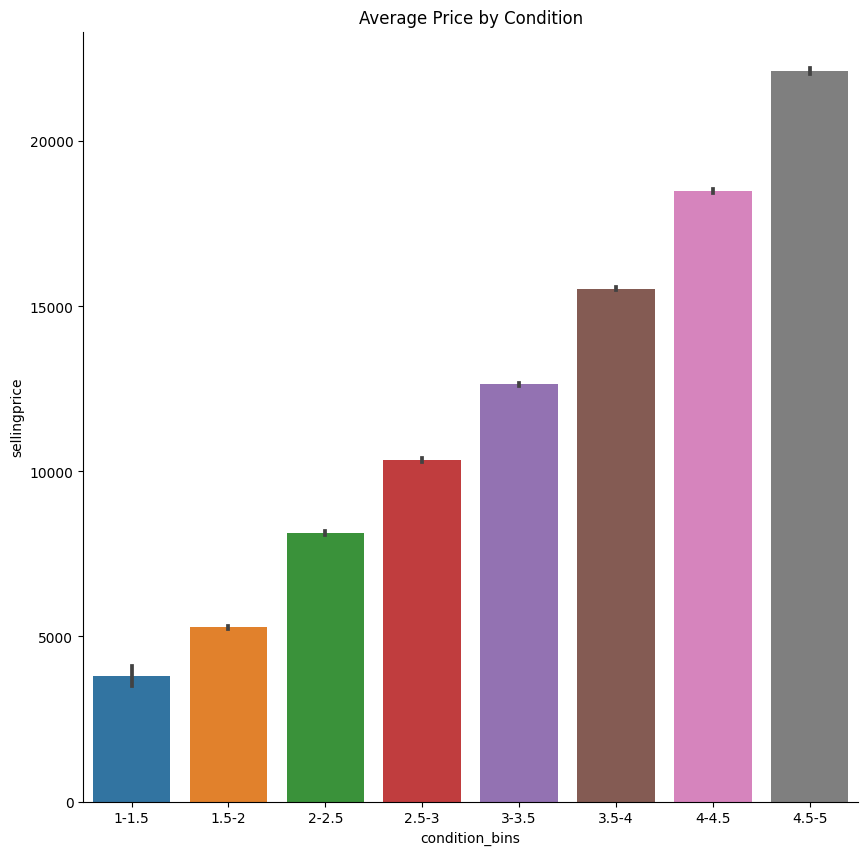

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["condition_bins"] = pd.cut(cars["condition"], bins=bins, labels=labels)

sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=cars
)

ax.set_title("Average Price by Condition")

sns.despine()